In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the clinical metadata

In [2]:
metadata = pd.read_csv('C:\\Users\\codete\\Desktop\\metadata.csv')
metadata

C:\Users\codete\AppData\Local\Temp\ipykernel_29656\4068167796.py:1: DtypeWarning: Columns (19,20,22,23,24,25,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('C:\\Users\\codete\\Desktop\\metadata.csv')


,isic_id,public,copyright_license,attribution,metadata.acquisition.pixels_x,metadata.acquisition.pixels_y,metadata.acquisition.image_type,metadata.clinical.sex,metadata.clinical.diagnosis,metadata.clinical.melanocytic,...,metadata.clinical.mel_thick_mm,metadata.clinical.mel_mitotic_index,metadata.clinical.mel_ulcer,metadata.clinical.lesion_id,metadata.clinical.patient_id,metadata.clinical.acquisition_day,metadata.clinical.nevus_type,metadata.acquisition.dermoscopic_type,metadata.clinical.family_hx_mm,metadata.clinical.personal_hx_mm
0,ISIC_8711280,True,CC-BY,Memorial Sloan Kettering Cancer Center,3264,2448,dermoscopic,female,nevus,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ISIC_3934294,True,CC-BY,Memorial Sloan Kettering Cancer Center,3264,2448,dermoscopic,female,nevus,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ISIC_0597218,True,CC-BY,Memorial Sloan Kettering Cancer Center,3264,2448,dermoscopic,female,nevus,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ISIC_2756237,True,CC-BY,Memorial Sloan Kettering Cancer Center,3264,2448,dermoscopic,female,nevus,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ISIC_7603455,True,CC-BY,Memorial Sloan Kettering Cancer Center,3264,2448,dermoscopic,female,nevus,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71018,ISIC_0000004,True,CC-0,Anonymous,1022,767,dermoscopic,male,melanoma,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71019,ISIC_0000003,True,CC-0,Anonymous,1022,767,dermoscopic,male,nevus,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71020,ISIC_0000002,True,CC-0,Anonymous,1022,767,dermoscopic,female,melanoma,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71021,ISIC_0000001,True,CC-0,Anonymous,1022,767,dermoscopic,female,nevus,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Breakdown by diagnosis and malignancy

In [3]:
diagnosis_breaddown_metadata = metadata.groupby(['metadata.clinical.diagnosis'], dropna=False, as_index=False).size()

In [22]:
diagnosis_breaddown_metadata.sort_values(by=['size'], ascending=False)[:11]

,metadata.clinical.diagnosis,size
16,nevus,28779
25,NaN,27402
13,melanoma,5851
7,basal cell carcinoma,3408
20,seborrheic keratosis,1525
18,pigmented benign keratosis,1100
2,actinic keratosis,910
22,squamous cell carcinoma,675
21,solar lentigo,428
23,vascular lesion,259


In [5]:
benign_malignant_breaddown_metadata = metadata.groupby(['metadata.clinical.benign_malignant'], dropna=False, as_index=False).size()

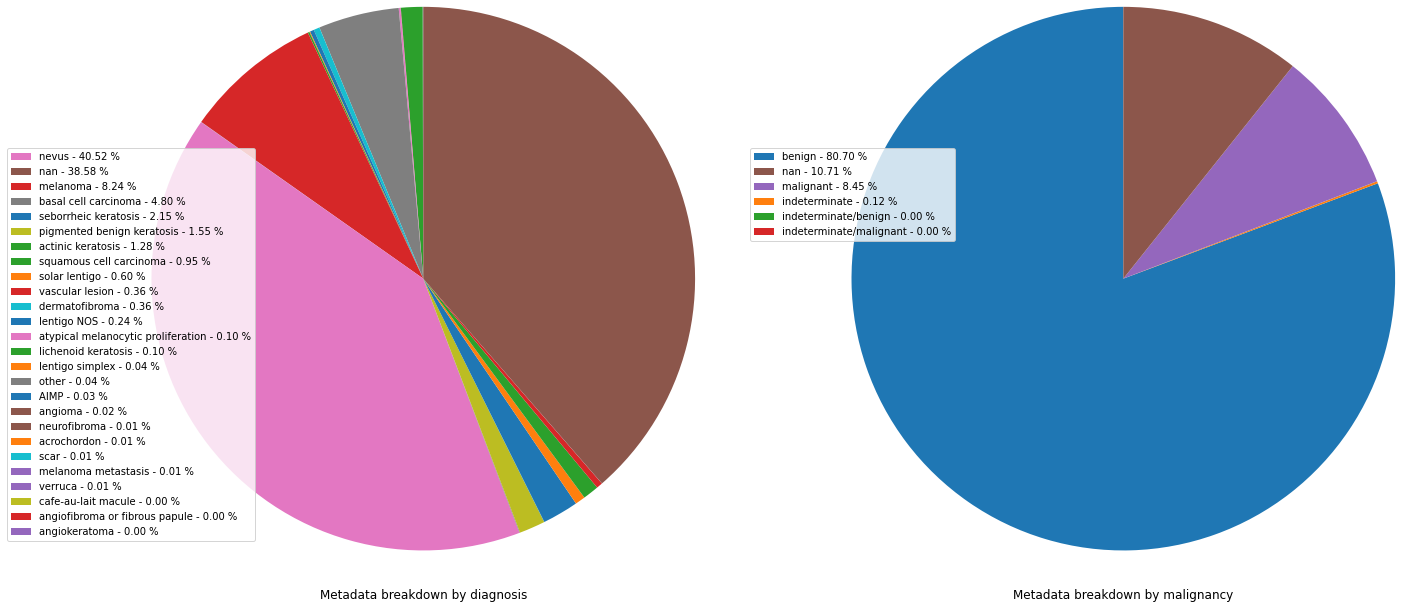

In [6]:
%matplotlib inline

plt.rcParams['axes.titley'] = -0.7

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23,5))

# diagnosis plot
data = diagnosis_breaddown_metadata['size']
keys = diagnosis_breaddown_metadata['metadata.clinical.diagnosis']
percentages = 100. * data / data.sum()

# plotting data on chart
patches, texts = ax1.pie(data, startangle=90, radius=2.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(keys, percentages)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                      key=lambda x: x[2],
                                      reverse=True))
ax1.set_title('Metadata breakdown by diagnosis')
ax1.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

# diagnosis plot
data = benign_malignant_breaddown_metadata['size']
keys = benign_malignant_breaddown_metadata['metadata.clinical.benign_malignant']
percentages = 100. * data / data.sum()

# plotting data on chart
patches, texts = ax2.pie(data, startangle=90, radius=2.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(keys, percentages)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                      key=lambda x: x[2],
                                      reverse=True))

ax2.set_title('Metadata breakdown by malignancy')
ax2.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

In [7]:
no_diagnosis_metadata = metadata[pd.isnull(metadata['metadata.clinical.diagnosis'])]

In [8]:
benign_malignant_breaddown_no_diagnosis_metadata = no_diagnosis_metadata.groupby(['metadata.clinical.benign_malignant'], dropna=False, as_index=False).size()

In [9]:
attribution_breaddown_no_diagnosis_metadata = no_diagnosis_metadata.groupby(['attribution'], dropna=False, as_index=False).size()

In [10]:
diagnosis_confirm_type_breaddown_no_diagnosis_metadata = no_diagnosis_metadata.groupby(['metadata.clinical.diagnosis_confirm_type'], dropna=False, as_index=False).size()

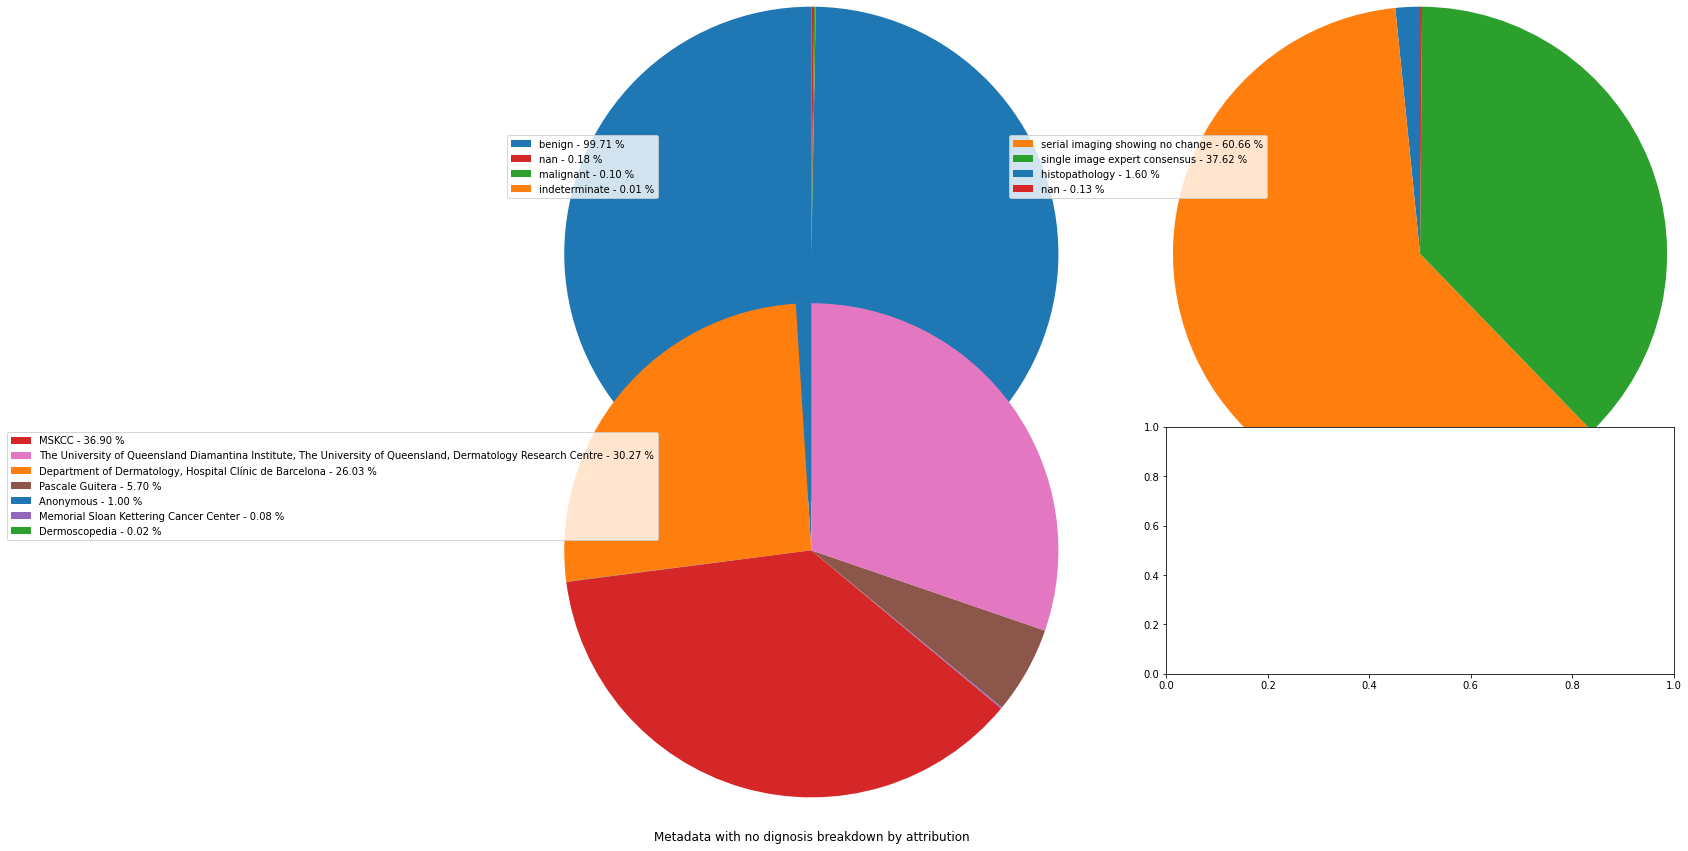

In [11]:
%matplotlib inline

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

# diagnosis plot
data = benign_malignant_breaddown_no_diagnosis_metadata['size']
keys = benign_malignant_breaddown_no_diagnosis_metadata['metadata.clinical.benign_malignant']
percentages = 100. * data / data.sum()

# plotting data on chart
patches, texts = ax1.pie(data, startangle=90, radius=2.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(keys, percentages)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                      key=lambda x: x[2],
                                      reverse=True))
ax1.set_title('Metadata with no dignosis breakdown by malignancy')
ax1.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

# diagnosis plot
data = diagnosis_confirm_type_breaddown_no_diagnosis_metadata['size']
keys = diagnosis_confirm_type_breaddown_no_diagnosis_metadata['metadata.clinical.diagnosis_confirm_type']
percentages = 100. * data / data.sum()

# plotting data on chart
patches, texts = ax2.pie(data, startangle=90, radius=2.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(keys, percentages)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                      key=lambda x: x[2],
                                      reverse=True))

ax2.set_title('Metadata with no dignosis breakdown by diagnosis confirmation type')
ax2.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

# diagnosis plot
data = attribution_breaddown_no_diagnosis_metadata['size']
keys = attribution_breaddown_no_diagnosis_metadata['attribution']
percentages = 100. * data / data.sum()

# plotting data on chart
patches, texts = ax3.pie(data, startangle=90, radius=2.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(keys, percentages)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                      key=lambda x: x[2],
                                      reverse=True))

ax3.set_title('Metadata with no dignosis breakdown by attribution')
ax3.legend(patches, labels, loc='upper right',  bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

In [12]:
yes_diagnosis_metadata = metadata[pd.notnull(metadata['metadata.clinical.diagnosis'])]

In [13]:
diagnosis_breaddown_yes_diagnosis_metadata = yes_diagnosis_metadata.groupby(['metadata.clinical.diagnosis'], dropna=False, as_index=False).size()

In [14]:
benign_malignant_breaddown_yes_diagnosis_metadata = yes_diagnosis_metadata.groupby(['metadata.clinical.benign_malignant'], dropna=False, as_index=False).size()

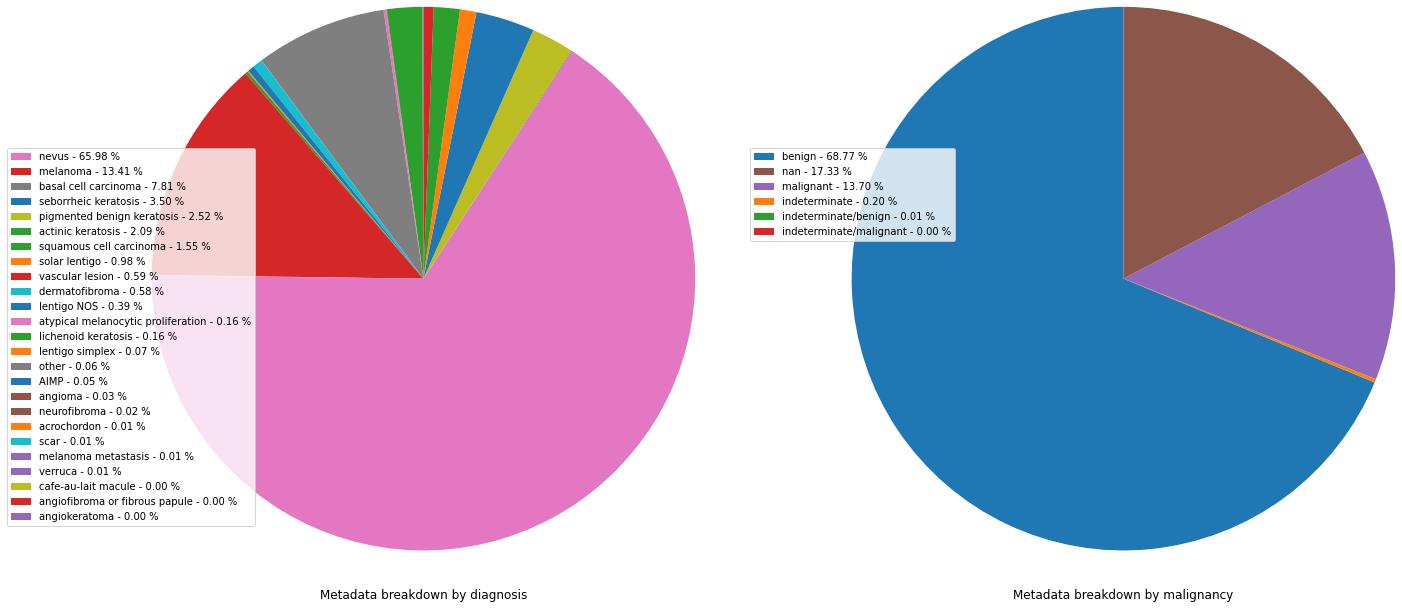

In [15]:
%matplotlib inline

plt.rcParams['axes.titley'] = -0.7

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23,5))

# diagnosis plot
data = diagnosis_breaddown_yes_diagnosis_metadata['size']
keys = diagnosis_breaddown_yes_diagnosis_metadata['metadata.clinical.diagnosis']
percentages = 100. * data / data.sum()

# plotting data on chart
patches, texts = ax1.pie(data, startangle=90, radius=2.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(keys, percentages)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                      key=lambda x: x[2],
                                      reverse=True))
ax1.set_title('Metadata breakdown by diagnosis')
ax1.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)

# diagnosis plot
data = benign_malignant_breaddown_yes_diagnosis_metadata['size']
keys = benign_malignant_breaddown_yes_diagnosis_metadata['metadata.clinical.benign_malignant']
percentages = 100. * data / data.sum()

# plotting data on chart
patches, texts = ax2.pie(data, startangle=90, radius=2.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(keys, percentages)]
patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                      key=lambda x: x[2],
                                      reverse=True))

ax2.set_title('Metadata breakdown by malignancy')
ax2.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=10)